# Land Use Land Cover Maps

* **Products used:** 
[io_lulc_v2](https://explorer.digitalearth.africa/products/io_lulc_v2), [esa_worldcover_2020](https://explorer.digitalearth.africa/products/esa_worldcover_2020), [esa_worldcover_2021](https://explorer.digitalearth.africa/products/esa_worldcover_2021), [cgls_landcover](https://explorer.digitalearth.africa/products/cgls_landcover), [cci_landcover](https://explorer.digitalearth.africa/products/cci_landcover)

## Background

**L**and **U**se/**L**and **C**over (LULC) maps classify land into broad categories such as water, crops, or built area. They are useful for visualising the dominant land uses in a given area. The total area or proportion of different classes can also be calculated for a specified area.

Many organisations publish LULC maps. DE Africa provides access to [the Environmental Systems Research Institute (Esri)/Impact Observatory (IO) land use/land cover (LULC)](https://www.arcgis.com/home/item.html?id=d3da5dd386d140cf93fc9ecbf8da5e31), [European Space Agency (ESA) WorldCover](https://esa-worldcover.org/en), [Copernicus Global Land Service (CGLS) Land Use/Land Cover at 100 m](https://land.copernicus.eu/global/content/annual-100m-global-land-cover-maps-available), and [ESA Climate Change Initiative (CCI) land cover](https://www.esa-landcover-cci.org/). The ESRI/IO and ESA products are derived from ESA Sentinel imagery and are available at 10 m resolution annually from 2017, 2020 and 2021 respectively over the entire African continent. The CGLS product is available at 100 m resolution, is updated annually and is currently available from 2015 to 2019. The ESA CCI landcover product is available at 300 resolution, is updated annually and is currently available from 1992 to 2022.

The accuracy of landcover maps changes with  location and class, so its important to understand the quality of the maps. ESRI publishes information on the accuracy of the 2020 (10 class version) LULC product, which is neatly summarised in the confusion matrix located [here](https://www.arcgis.com/home/item.html?id=d6642f8a4f6d4685a24ae2dc0c73d4ac). The overall accuracy for all classes is 85 %. Keep in mind that the accuracy statistics in the link are for the globe and not specific to Africa.

ESA's WorldCover product comes with an in-depth report on the quality of the product, which we will not reproduce here. However, the full product validation report can be found using the following link: https://esa-worldcover.org/en/data-access. The overall accuracy of the 2020 product for Africa  is 73.6%, and it improved to 76.5% in 2021.

The Copernicus Global Land Cover 100m product has a [scientific publication](https://www.sciencedirect.com/science/article/pii/S0034425721004065?via%3Dihub) exploring the accuracy of the annual landcover maps. The overall accuracy for Africa is ~80 %.


**Important details:**
* Classes and values

|io_lulc value|io_lulc class|esa value|esa class|cgls value|cgls class|cci value|cci class|
|---|---|---|---|---|---|---|---|
|0|no data|0|no data|0|no data|0|no data|
|1|water|10|tree cover|20|shrubs|10|cropland, rainfed|
|2|trees|20|shrubland|30|herbaceous vegetation|11|cropland, rainfed, herbaceous cover|
|3|not used|30|grassland|40|cultivated and managed vegetation or agriculture|12|cropland, rainfed, tree or shrub cover|
|4|flooded vegetation|40|cropland|50|urban or built up|20|cropland, irrigated or post-flooding|
|5|crops|50|built up|60|bare or sparse vegetation|30|mosaic cropland/natural vegetation|
|6|not used|60|bare/sparse vegetation|70|snow and ice|40|mosaic natural vegetation/cropland|
|7|built area|70|snow and ice|80|permanent water bodies|50|tree cover, broadleaved, evergreen, closed to open|
|8|bare ground|80|permanent water bodies|90|herbaceous wetland|60|tree cover, broadleaved, deciduous, closed to open|
|9|snow/ice|90|herbaceous wetland|100|moss and lichen|61|tree cover, broadleaved, deciduous, closed|
|10|clouds|95|mangroves|111|closed forest, evergreen needle leaf|62|tree cover, broadleaved, deciduous, open|
|11|rangeland|100|moss and lichen|112|closed forest, evergreen broad leaf|70|tree cover, needleleaved, evergreen, closed to open|
|||||113|closed forest, deciduous needle leaf|71|tree cover, needleleaved, evergreen, closed|
|||||114|closed forest, deciduous broad leaf|72|tree cover, needleleaved, evergreen, open|
|||||115|closed forest, mixed|80|tree cover, needleleaved, deciduous, closed to open|
|||||116|closed forest, unknown|81|tree cover, needleleaved, deciduous, closed|
|||||121|open forest, evergreen needle leaf|82|tree cover, needleleaved, deciduous, open|
|||||122|open forest, evergreen broad leaf|90|tree cover, mixed leaf type|
|||||123|open forest, deciduous needle leaf|100|mosaic tree and shrub/herbaceous cover|
|||||124|open forest, deciduous broad leaf|110|mosaic herbaceous cover/tree and shrub|
|||||125|open forest, mixed|120| shrubland|
|||||126|open forest, unknown|121|shrubland, evergreen|
|||||200|open sea|122|shrubland, deciduous|
|||||||130| grassland|
|||||||140|lichens and mosses|
|||||||150|sparse vegetation|
|||||||151|sparse tree|
|||||||152|sparse shrub|
|||||||153|sparse herbaceous cover|
|||||||160|tree cover, flooded, fresh or brakish water|
|||||||170|tree cover, flooded, saline water|
|||||||180|shrub or herbaceous cover, flooded, fresh/saline/brakish water|
|||||||190|urban areas|
|||||||200|bare areas|
|||||||201|consolidated bare areas|
|||||||202|unconsolidated bare areas|
|||||||210|water bodies|
|||||||220|permanent snow and ice|

* Time range and spatial resolution     

||**io_lulc**|**esa_worldcover**|**cgls_landcover**|**cci_landcover**|
|---|---|---|---|---|
|**Time-range**|2017-2023|2020-2021|2015-2019|1992-2022|
|**Spatial resolution**|10m|10m|100m|300m|

## Description

In this notebook we will load LULC data using `dc.load()` to return a map of land use and land cover classes for a specified area.

Topics covered include:
1. Inspecting the LULC product available in the datacube
2. Using the `dc.load()` function to load in LULC data
3. Plotting LULC using the `plot_lulc()` function
4. An example analysis of the area of LULC classes in a given area
5. Loading and plotting the 'cover fractions' in CGLS

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
%matplotlib inline

import datacube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from deafrica_tools.plotting import display_map, plot_lulc

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Landcover_Classification")

### List measurements

We can inspect the data available for LULC using datacube's `list_measurements` functionality. The table below lists the products and measurements available for the two LULC datasets indexed within DE Africa's datacube. We can see that the product contains one layer named 'classification'. The datatype is integer, which corresponds to a LULC class.

In [3]:
product_name = ['io_lulc_v2', 'esa_worldcover_2020', 'esa_worldcover_2021', 'cgls_landcover', 'cci_landcover'] 

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

name  \
product             measurement                                                    
io_lulc_v2          supercell                                          supercell   
esa_worldcover_2020 classification                                classification   
esa_worldcover_2021 classification                                classification   
cgls_landcover      classification                                classification   
                    forest_type                                      forest_type   
                    classification_probability        classification_probability   
                    bare_cover_fraction                      bare_cover_fraction   
                    builtup_cover_fraction                builtup_cover_fraction   
                    crops_cover_fraction                    crops_cover_fraction   
                    grass_cover_fraction                    grass_cover_fraction   
                    mosslichen_cover_fraction          mosslichen_cover_fraction   
                    permanentwater_cover_fraction  permanentwater_cover_fraction   
                    seasonalwater_cover_fraction    seasonalwater_cover_fraction   
                    shrub_cover_fraction                    shrub_cover_fraction   
                    snow_cover_fraction                      snow_cover_fraction   
                    tree_cover_fraction                      tree_cover_fraction   
cci_landcover       classification                                classification   

                                                   dtype    units nodata  \
product             measurement                                            
io_lulc_v2          supercell                      uint8        1      0   
esa_worldcover_2020 classification                 uint8        1      0   
esa_worldcover_2021 classification                 uint8        1      0   
cgls_landcover      classification                 uint8        1    255   
                    forest_type                    uint8  percent    255   
                    classification_probability     uint8  percent    255   
                    bare_cover_fraction            uint8  percent    255   
                    builtup_cover_fraction         uint8  percent    255   
                    crops_cover_fraction           uint8  percent    255   
                    grass_cover_fraction           uint8  percent    255   
                    mosslichen_cover_fraction      uint8  percent    255   
                    permanentwater_cover_fraction  uint8  percent    255   
                    seasonalwater_cover_fraction   uint8  percent    255   
                    shrub_cover_fraction           uint8  percent    255   
                    snow_cover_fraction            uint8  percent    255   
                    tree_cover_fraction            uint8  percent    255   
cci_landcover       classification                 uint8        1      0   

                                                            aliases  \
product             measurement                                       
io_lulc_v2          supercell                      [classification]   
esa_worldcover_2020 classification                              NaN   
esa_worldcover_2021 classification                              NaN   
cgls_landcover      classification                          [class]   
                    forest_type                                  []   
                    classification_probability               [prob]   
                    bare_cover_fraction                      [bare]   
                    builtup_cover_fraction                [builtup]   
                    crops_cover_fraction                    [crops]   
                    grass_cover_fraction                    [grass]   
                    mosslichen_cover_fraction          [mosslichen]   
                    permanentwater_cover_fraction  [permanentwater]   
                    seasonalwater_cover_

### Analysis parameters

This section defines the analysis parameters, including:

* `lat, lon, buffer`: center lat/lon and analysis window size for the area of interest
* `resolution`: the pixel resolution to use for loading the LULC dataset. The native resolution of the product is 10 metres i.e. `(-10,10)`
* `measurements`: the 'band' or measurement to load from the product, we can use the native measurement names of one of the aliases

The default location is Madagascar

In [4]:
lat, lon = -19.4557, 46.4644

buffer = 5.0

resolution=(-500, 500) #resample so we can view a large area

measurements='classification'

#convert the lat,lon,buffer into a range
lons = (lon - buffer, lon + buffer)
lats = (lat - buffer, lat + buffer)

## Load the LULC datasets

First, we'll load the ESRI Land Cover. For this annual product, the time window listed in the metadata for a year is from 1 Jan to 1 Jan next year, e.g. 2020 data has a start date of 1 Jan 2020 and end date of 1 Jan 2021. We therefore define the query with both year and month to avoid loading data from a neighboring year.

In [5]:
#create reusable datacube query object
query = {
    'time': ('2020-07'),
    'x': lons,
    'y': lats,
    'resolution':resolution,
    'output_crs': 'epsg:6933',
    'measurements':measurements
}

#load the data
ds_io = dc.load(product='io_lulc_v2', **query).squeeze()

print(ds_io)

<xarray.Dataset> Size: 5MB
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 8B 2020-07-01T23:59:59.997500
  * y               (y) float64 19kB -1.825e+06 -1.826e+06 ... -3.028e+06
  * x               (x) float64 15kB 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (y, x) uint8 5MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


Now we can load the `esa_worldcover_2020`,`esa_worldcover_2021`, `cgls_landcover`, and `cci_landcover` products over the same region.

In [6]:
ds_esa_2020 = dc.load(product='esa_worldcover_2020', time='2020', measurements=measurements, like=ds_io.geobox).squeeze()

print(ds_esa_2020)

<xarray.Dataset> Size: 5MB
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 8B 2020-07-01T12:00:00
  * y               (y) float64 19kB -1.825e+06 -1.826e+06 ... -3.028e+06
  * x               (x) float64 15kB 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (y, x) uint8 5MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


In [7]:
ds_esa_2021 = dc.load(product='esa_worldcover_2021', time='2021', measurements=measurements, like=ds_io.geobox).squeeze()

print(ds_esa_2021)

<xarray.Dataset> Size: 5MB
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 8B 2021-07-02
  * y               (y) float64 19kB -1.825e+06 -1.826e+06 ... -3.028e+06
  * x               (x) float64 15kB 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (y, x) uint8 5MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


In [8]:
ds_cgls = dc.load(product='cgls_landcover', time='2019', measurements=measurements, like=ds_io.geobox).squeeze()

print(ds_cgls)

<xarray.Dataset> Size: 5MB
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 8B 2019-07-02T11:59:59.500000
  * y               (y) float64 19kB -1.825e+06 -1.826e+06 ... -3.028e+06
  * x               (x) float64 15kB 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (y, x) uint8 5MB 200 200 200 200 200 ... 200 200 200 200 200
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


In [9]:
ds_cci = dc.load(product='cci_landcover', time='2022', measurements=measurements, like=ds_io.geobox).squeeze()

print(ds_cci)

<xarray.Dataset> Size: 5MB
Dimensions:         (y: 2407, x: 1931)
Coordinates:
    time            datetime64[ns] 8B 2022-07-02T11:59:59.500000
  * y               (y) float64 19kB -1.825e+06 -1.826e+06 ... -3.028e+06
  * x               (x) float64 15kB 4.001e+06 4.001e+06 ... 4.965e+06 4.966e+06
    spatial_ref     int32 4B 6933
Data variables:
    classification  (y, x) uint8 5MB 210 210 210 210 210 ... 210 210 210 210 210
Attributes:
    crs:           PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 Global",GEOGCS["WGS 8...
    grid_mapping:  spatial_ref


## Plotting data

We can plot LULC for Madagascar and add a legend which corresponds to the classes using the DE Africa wrapper function `plot_lulc`. We can see that trees dominate the eastern areas of the island, while scrub/shrub is more prevalent on the western side. We can also identify a few cities/towns with the red 'built area' class.  You may also notice that the different datasets don't always agree.

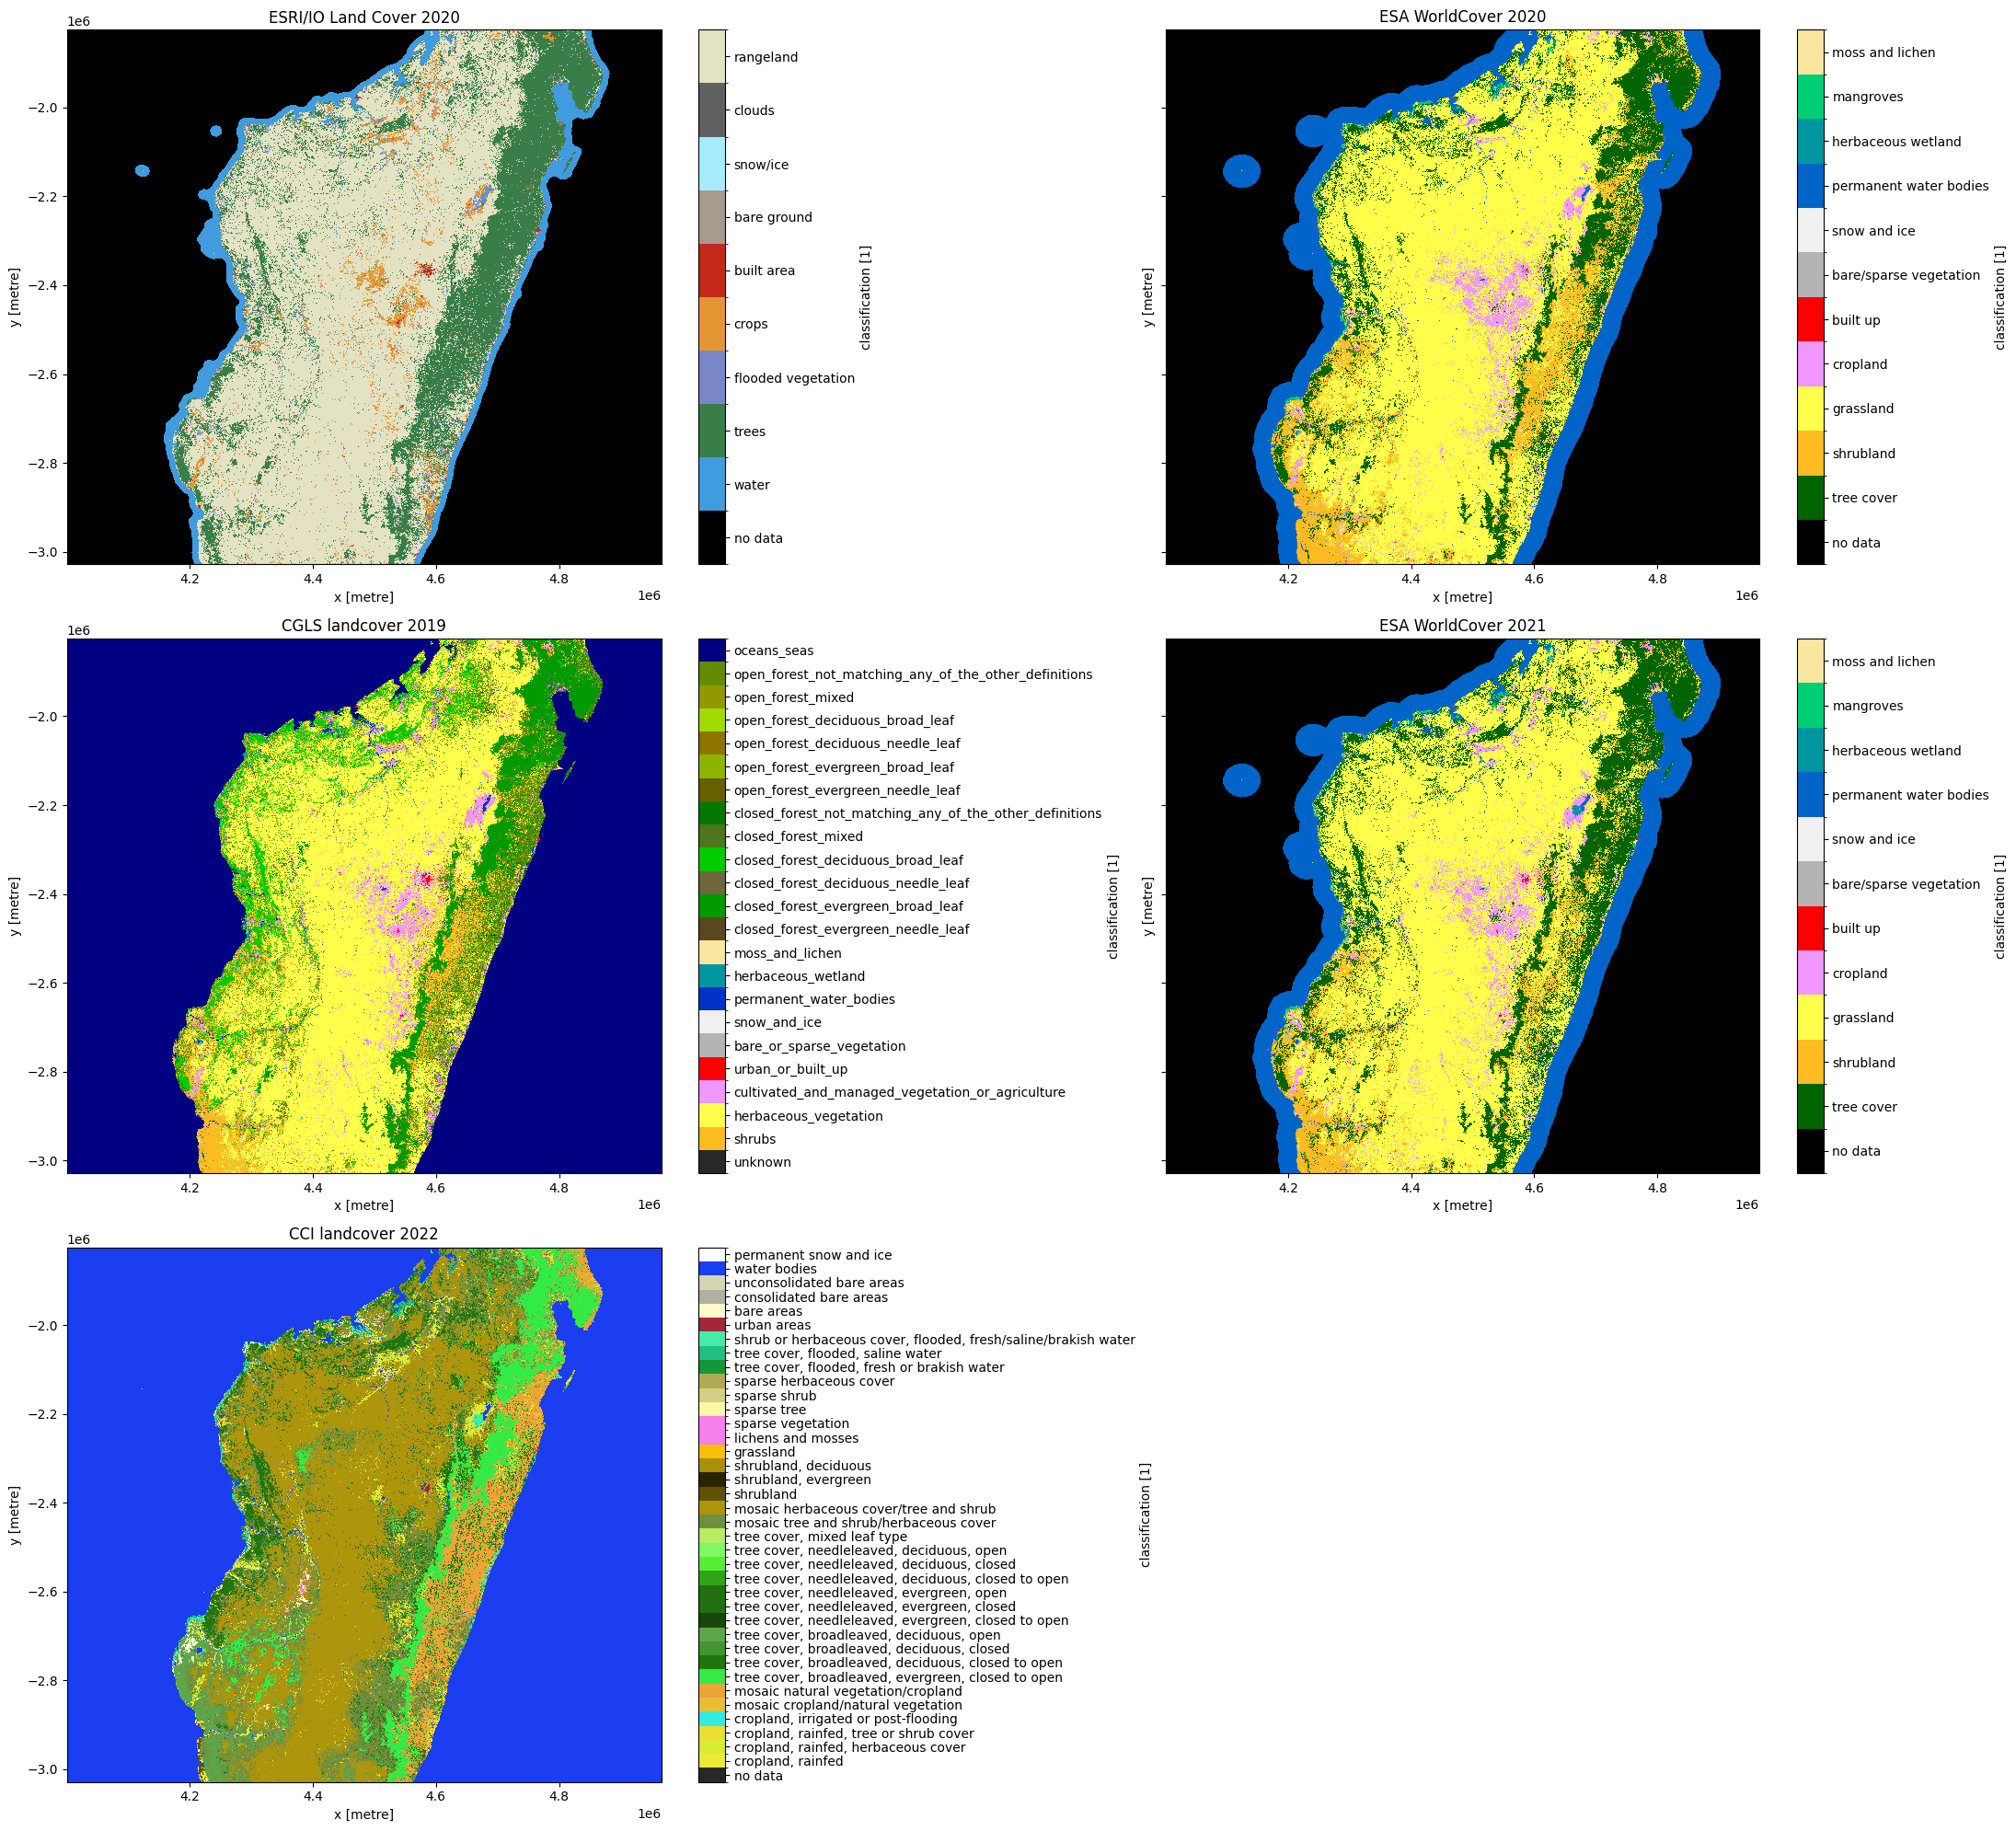

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(22, 20), sharey=True)
plot_lulc(ds_io[measurements], product="IO", legend=True, ax=ax[0, 0])
plot_lulc(ds_esa_2020[measurements], product="ESA", legend=True, ax=ax[0, 1])
plot_lulc(ds_esa_2021[measurements], product="ESA", legend=True, ax=ax[1, 1])
plot_lulc(ds_cgls[measurements], product="CGLS", legend=True, ax=ax[1, 0])
plot_lulc(ds_cci[measurements], product="CCI", legend=True, ax=ax[2, 0])
ax[0, 0].set_title("ESRI/IO Land Cover 2020")
ax[0, 1].set_title("ESA WorldCover 2020")
ax[1, 1].set_title("ESA WorldCover 2021")
ax[1, 0].set_title("CGLS landcover 2019")
ax[2, 0].set_title("CCI landcover 2022")
fig.delaxes(ax[2, 1])
plt.tight_layout();

## Example Analysis: Investigate the area of classes

In this example, we will look more closely at the city of Antananarivo, the capital of Madagascar, which can be seen in red in the map above.  We will load all LULC datasets, calculate the area of each class in each product, and compare the area of classes between the products.  As we are looking at a smaller area, we can load the datasets at 100m resolution (its good practice to down-sample higher resolution datasets to a coarser resolution than vice-versa). We use the 'mode' statistic to down sample the 10m datasets to 100m resolution, this means each pixel will be assigned the most-common class within the 100m metre pixel.

First, let's set up some new parameters

In [11]:
lat, lon =  -18.9028, 47.5203
buffer = 0.1
resolution=(-100,100)
measuremnents='classification'

#add lat,lon,buffer to get bounding box
lon_range = (lon-buffer, lon+buffer)
lat_range =  (lat+buffer, lat-buffer)

### View selected location

In [12]:
display_map(x=lon_range, y=lat_range)

### Load LULC data for Antananarivo

In [13]:
query = {
    "x": lon_range,
    "y": lat_range,
    "resolution": resolution,
    "output_crs": "epsg:6933",
    "measurements": measurements,
}

# load the esri product
ds_io = dc.load(product="io_lulc_v2", resampling='mode', 
                time='2020-07', **query).squeeze()

# load the esa 2020 product
ds_esa_2020 = dc.load(product="esa_worldcover_2021", resampling='mode',
                 time='2021', measurements=measurements, like=ds_io.geobox).squeeze()

# load the esa 2021 product
ds_esa_2021 = dc.load(product="esa_worldcover_2020", resampling='mode',
                 time='2020', measurements=measurements, like=ds_io.geobox).squeeze()

# load the cgls product
ds_cgls = dc.load(
    product="cgls_landcover",
    time="2019",
    measurements=measurements,
    like=ds_io.geobox
).squeeze()

# load the cci product
ds_cci = dc.load(
    product="cci_landcover",
    time="2022",
    measurements=measurements,
    resampling='nearest',
    like=ds_io.geobox
).squeeze()

### Plot the datasets

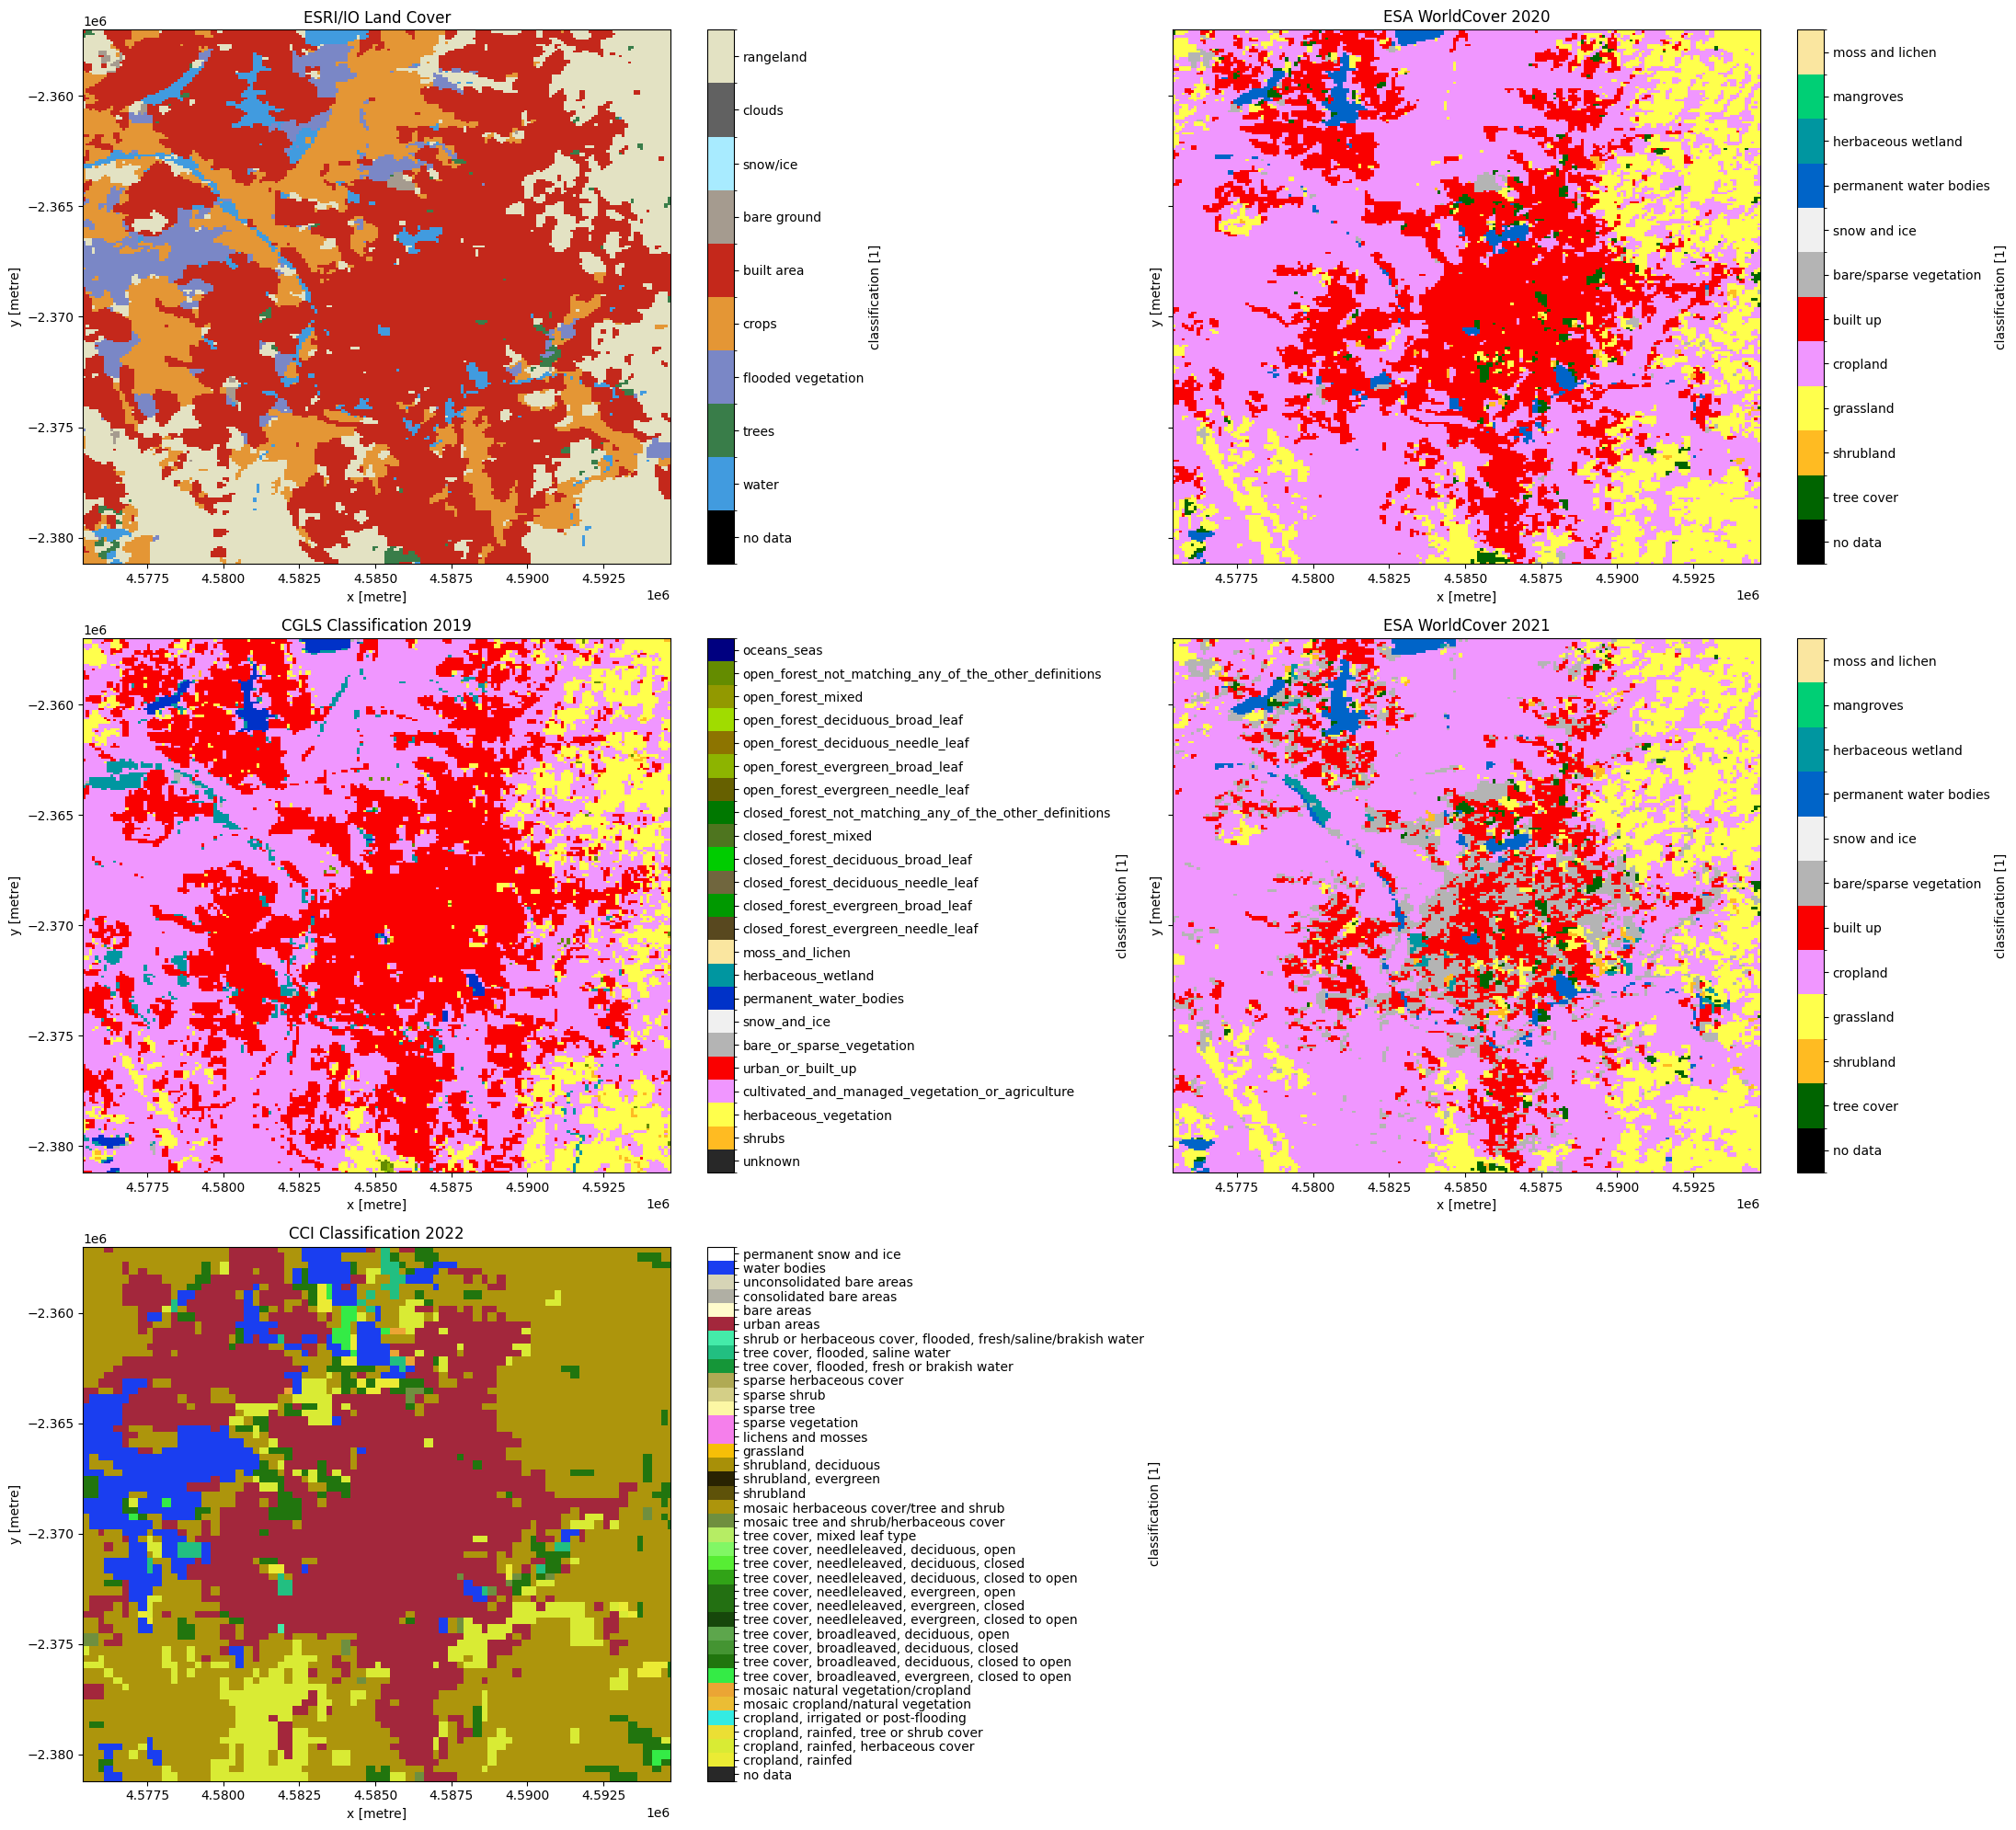

In [14]:
fig,ax = plt.subplots(3,2, figsize=(22,20), sharey=True)
plot_lulc(ds_io[measurements], product='IO', legend=True, ax=ax[0,0])
plot_lulc(ds_esa_2020[measurements], product='ESA', legend=True, ax=ax[0,1])
plot_lulc(ds_esa_2021[measurements], product='ESA', legend=True, ax=ax[1,1])
plot_lulc(ds_cgls[measurements], product='CGLS', legend=True, ax=ax[1,0])
plot_lulc(ds_cci[measurements], product='CCI', legend=True, ax=ax[2,0])
ax[0,0].set_title('ESRI/IO Land Cover')
ax[0,1].set_title('ESA WorldCover 2020')
ax[1,1].set_title('ESA WorldCover 2021')
ax[1,0].set_title('CGLS Classification 2019')
ax[2,0].set_title('CCI Classification 2022')
fig.delaxes(ax[2, 1])
plt.tight_layout();

### Calculate the area of each class

We can use the numpy `np.unique` function to return the pixel count for each class.

In [15]:
ds_io_counts = np.unique(ds_io[measurements].data, return_counts=True)
ds_esa_2020_counts = np.unique(ds_esa_2020[measurements].data, return_counts=True)
ds_esa_2021_counts = np.unique(ds_esa_2021[measurements].data, return_counts=True)
ds_cgls_counts = np.unique(ds_cgls[measurements].data, return_counts=True)
ds_cci_counts = np.unique(ds_cci[measurements].data, return_counts=True)


print(ds_io_counts)

(array([ 1,  2,  4,  5,  7,  8, 11], dtype=uint8), array([ 1360,   306,  2312,  8052, 23874,   130, 10672]))


We can see above that result is an array with classes 1:11 which corresponds to `water` through to `rangeland`, and the count of pixels within these classes. Using the resolution we set in our data loading query, we can calculate the total area of each class in square kilometres and plot the results. Does the plot align with the proportions of classes we can visualise in the map of Antananarivo?

For more information on area calculations see the water extent calculation section of the Digital Earth Africa Sandbox [training course](https://learn.digitalearthafrica.org/courses/course-v1:digitalearthafrica+DEA101+2021/course/).

In [16]:
pixel_length = query["resolution"][1]  # in metres, refers to resolution we defined above (-10,10) for Antananarivo
m_per_km = 1000  # conversion from metres to kilometres
area_per_pixel = pixel_length**2 / m_per_km**2

#calculate the area of each class
ds_io_area = np.array(ds_io_counts[1] * area_per_pixel)
ds_esa_2020_area = np.array(ds_esa_2020_counts[1] * area_per_pixel)
ds_esa_2021_area = np.array(ds_esa_2021_counts[1] * area_per_pixel)
ds_cgls_area = np.array(ds_cgls_counts[1] * area_per_pixel)
ds_cci_area = np.array(ds_cci_counts[1] * area_per_pixel)

### Plot the area of each class

In the plot below, are the proportions of classes similar between the products? What are the classes that typically show confusion?

In [17]:
# list of classes actually in the map by extracting from the `flags_definition`
io_classes = [ds_io.classification.flags_definition['data']['values'][str(x)] for x in ds_io_counts[0]]
esa_classes_2020 = [ds_esa_2020.classification.flags_definition['data']['values'][str(x)] for x in ds_esa_2020_counts[0]]
esa_classes_2021 = [ds_esa_2021.classification.flags_definition['data']['values'][str(x)] for x in ds_esa_2021_counts[0]]
cgls_classes = [ds_cgls.classification.flags_definition['data']['values'][str(x)] for x in ds_cgls_counts[0]]
cci_classes = [ds_cci.classification.flags_definition['data']['values'][str(x)] for x in ds_cci_counts[0]]

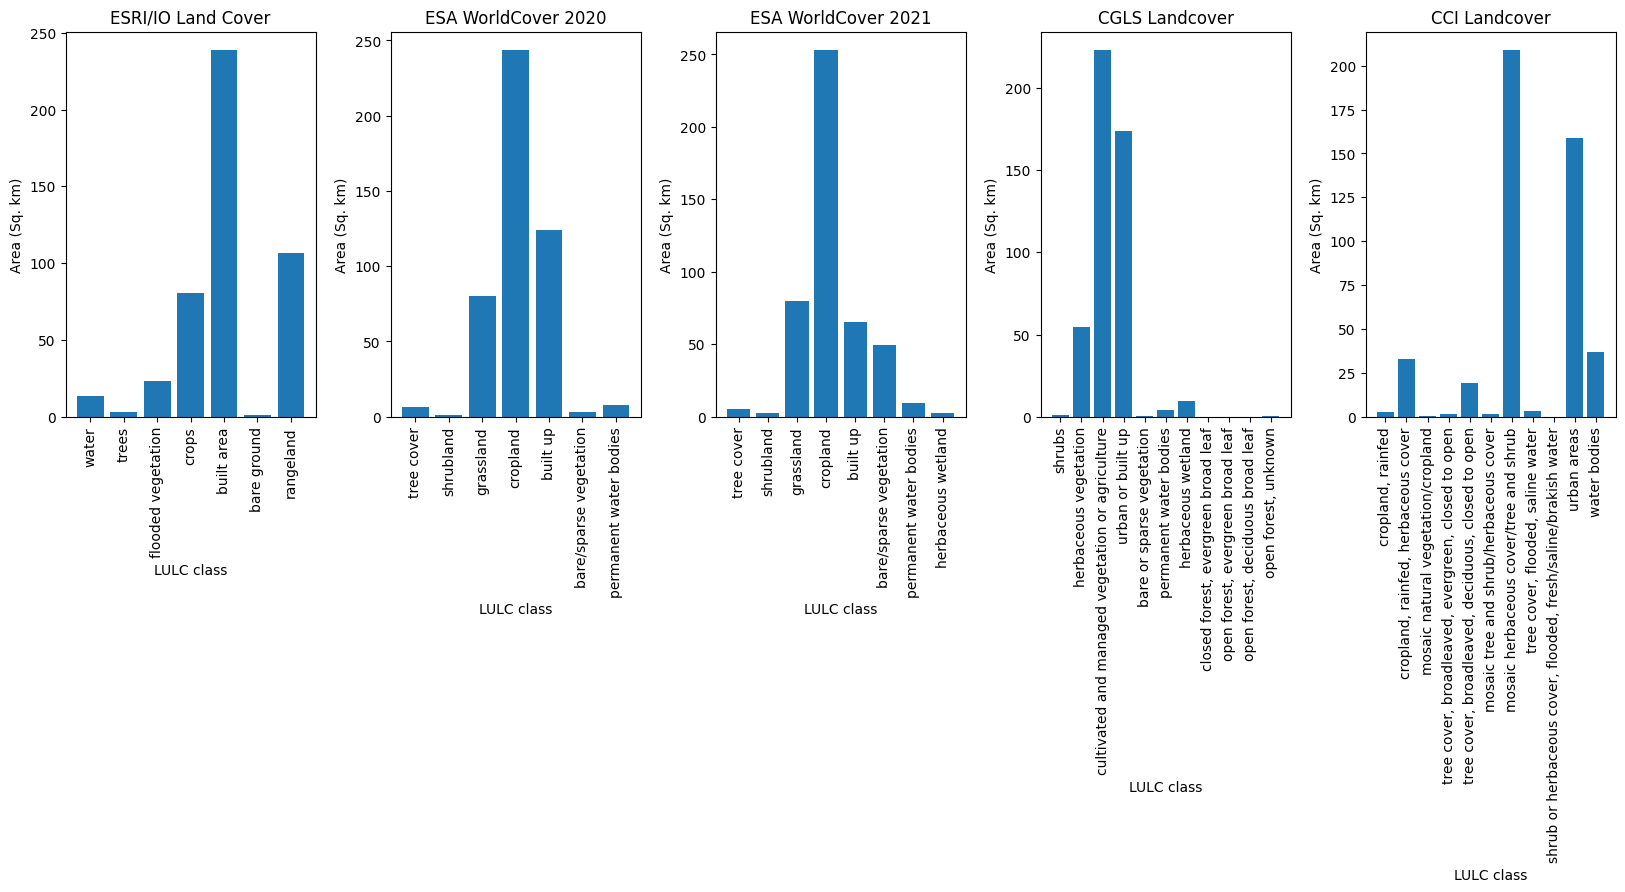

In [18]:
fig,ax=plt.subplots(1,5, figsize=(20,5))

#plot esri
ax[0].bar(io_classes, ds_io_area)
ticks_loc = ax[0].get_xticks()
ax[0].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax[0].set_xticklabels(io_classes, rotation=90)
ax[0].set_xlabel("LULC class")
ax[0].set_ylabel("Area (Sq. km)")

#plot esa worldcover 2020
ax[1].bar(esa_classes_2020, ds_esa_2020_area)
ticks_1 = ax[1].get_xticks()
ax[1].xaxis.set_major_locator(mticker.FixedLocator(ticks_1))
ax[1].set_xticklabels(esa_classes_2020, rotation=90)
ax[1].set_xlabel("LULC class")
ax[1].set_ylabel("Area (Sq. km)")

#plot esa worldcover 2021
ax[2].bar(esa_classes_2021, ds_esa_2021_area)
ticks_1 = ax[2].get_xticks()
ax[2].xaxis.set_major_locator(mticker.FixedLocator(ticks_1))
ax[2].set_xticklabels(esa_classes_2021, rotation=90)
ax[2].set_xlabel("LULC class")
ax[2].set_ylabel("Area (Sq. km)")

#plot cgls
ax[3].bar(cgls_classes, ds_cgls_area)
ticks_2 = ax[3].get_xticks()
ax[3].xaxis.set_major_locator(mticker.FixedLocator(ticks_2))
ax[3].set_xticklabels(cgls_classes, rotation=90)
ax[3].set_xlabel("LULC class")
ax[3].set_ylabel("Area (Sq. km)")

#plot cci
ax[4].bar(cci_classes, ds_cci_area)
ticks_2 = ax[4].get_xticks()
ax[4].xaxis.set_major_locator(mticker.FixedLocator(ticks_2))
ax[4].set_xticklabels(cci_classes, rotation=90)
ax[4].set_xlabel("LULC class")
ax[4].set_ylabel("Area (Sq. km)")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('ESRI/IO Land Cover')
ax[1].set_title('ESA WorldCover 2020')
ax[2].set_title('ESA WorldCover 2021')
ax[3].set_title('CGLS Landcover')
ax[4].set_title('CCI Landcover 2022');

## Explore CGLS cover fraction

In the above analysis we can see that the CGLS product classifies a lof of the area in our Antananarivo bounds as 'urban or built up'. Let's see how this relates to the builtup cover fraction measurement in the CGLS product. 

The cover fraction measurements in CGLS express the percentage of the pixel that is covered by a specific class of land cover, in this case urban or built-up. We can see below that the percentage cover of urban or built-up area corresponds spatially to the landcover classification.

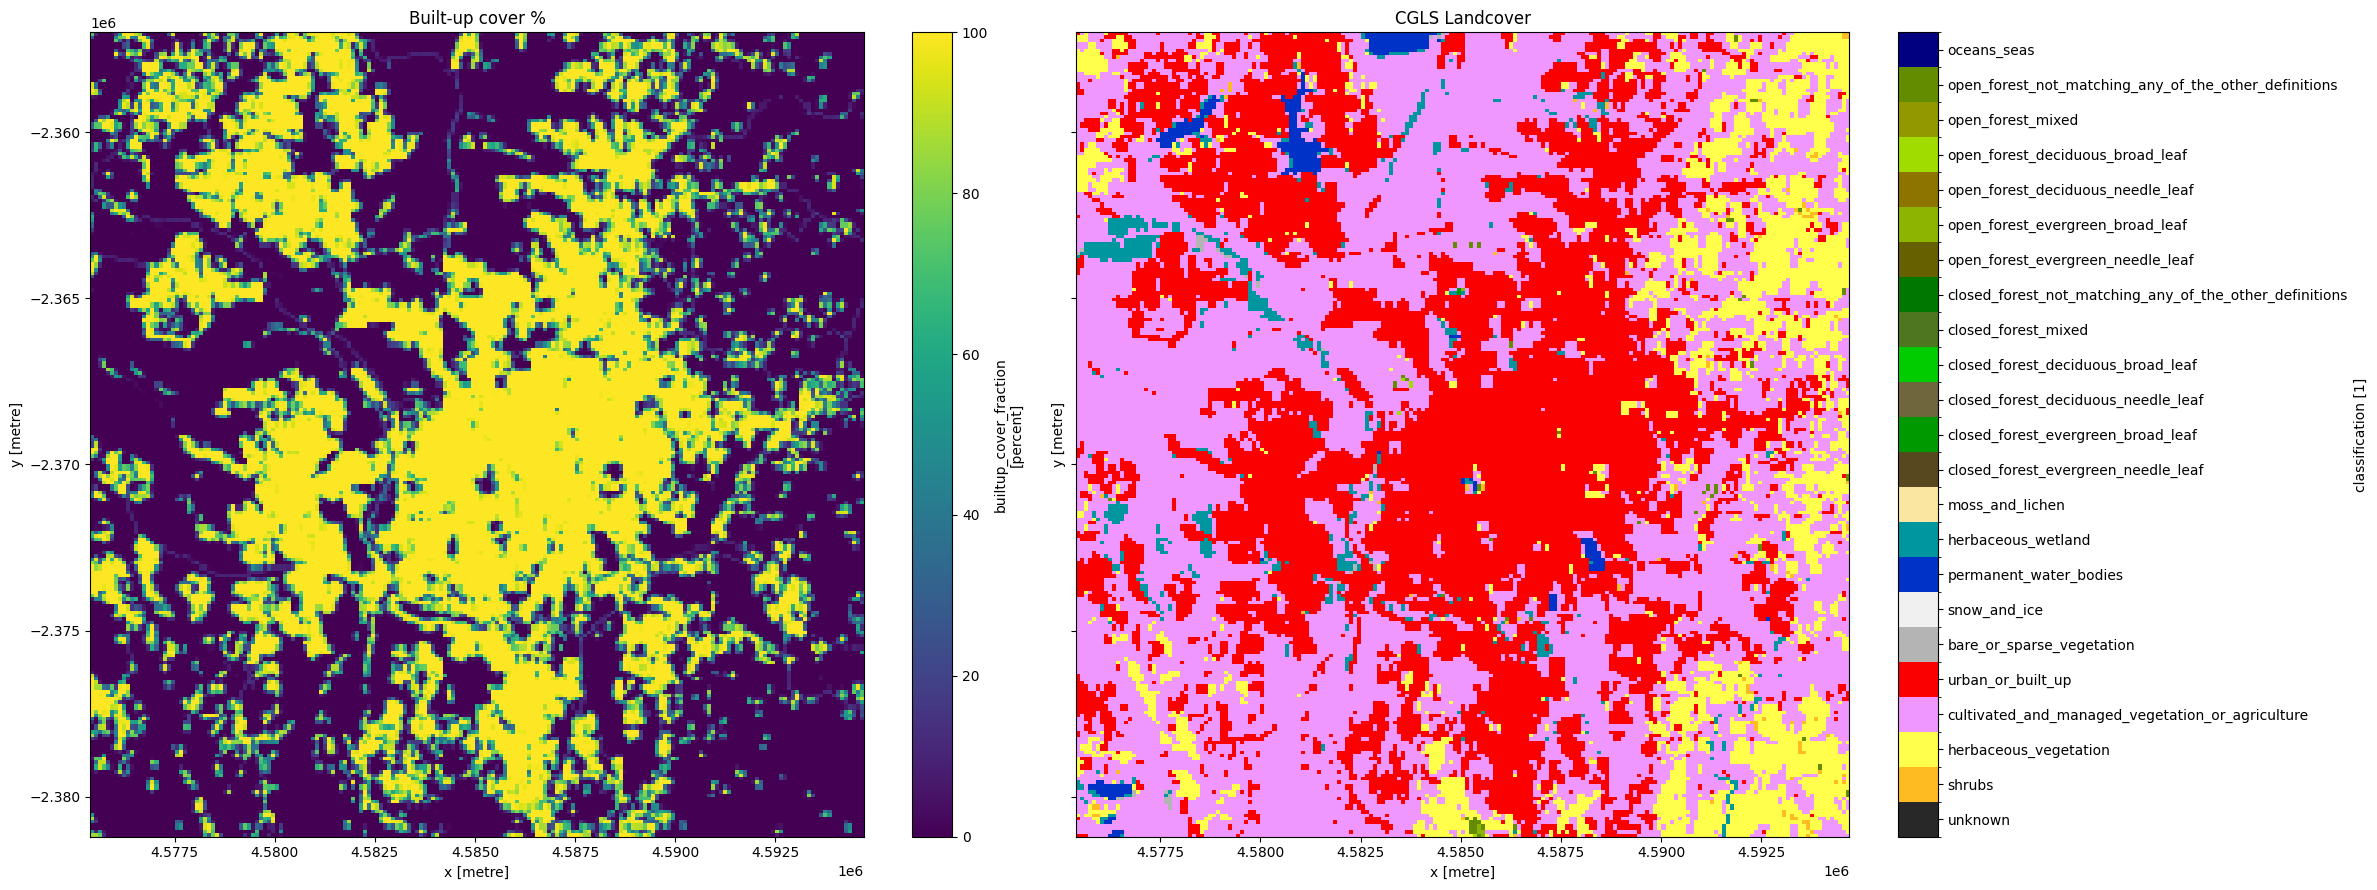

In [19]:
#load the cgls product
ds_cgls_urbancover = dc.load(product='cgls_landcover', time='2019', measurements='builtup_cover_fraction', like=ds_cgls.geobox).squeeze()

#plot the dataset
fig,ax = plt.subplots(1,2, figsize=(24,9), sharey=True)
ds_cgls_urbancover.builtup_cover_fraction.plot(ax=ax[0])
plot_lulc(ds_cgls[measurements], product='CGLS', legend=True, ax=ax[1])

ax[0].set_title('Built-up cover %')
ax[1].set_title('CGLS Landcover')
plt.tight_layout();

---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [20]:
print(datacube.__version__)

1.8.20


**Last tested:**

In [21]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-10-02'